## Lojistik Regresyon Sınıflandırması

winequality white veri seti kullanılmıştır.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Veri setinin satır ve sütun sayısını görüntüleme

In [100]:
df.shape

(4898, 12)

Veri kümesinin bilgilerini görüntüleme

info() metodu, veri setindeki her sütunun ismini, her sütundaki değerlerin sayısını, sütunların veri türlerini, bellek kullanımını ve eksik değerlerin sayısını gösterir.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Veri setinin istatistiksel bilgilerini görüntüleme

In [102]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Tüm sütunlardaki eksik değerleri kontrol etme

In [103]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [104]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

937


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


Veri setindeki tekrarlayan satırları kaldırmalıyız. Çünkü gereksiz veri yükünü azaltmak ve model performansını arttırmak için bu gereklidir. Aynı satırlarlar, aynı bilgiyi içerdiğinden ve modelin performansını artırmaktan ziyade, aksine aşırı uyum (overfitting) oluşmasına neden olabilir. Bu durumda, model, eğitim verilerinde çok iyi performans gösterirken, test verilerinde veya gerçek hayatta karşılaşacağı verilerde kötü performans gösterir.

In [105]:
df.drop_duplicates(inplace=True)
df.shape

(3961, 12)

### Veri Görselleştirme

Şarap kalitesi 1 ile 10 arasında değerlerle gösterilmiştir.
Ve aşağıdaki kod her değerin kaç defa tekrarlandığını gösteriyor.

In [106]:
print(df.quality.value_counts())

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64


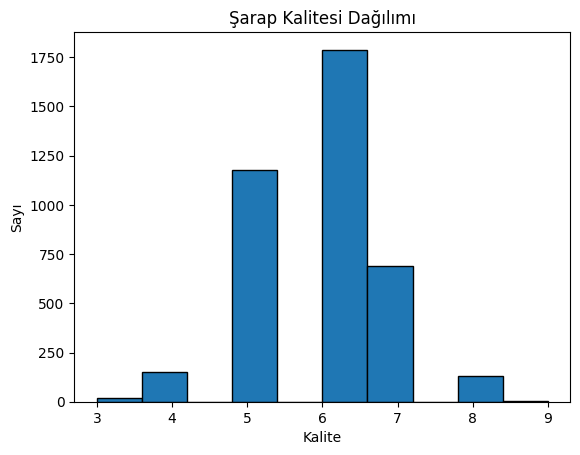

In [107]:
# 'quality' sütununun histogramını oluşturma
plt.hist(df['quality'], bins=10, edgecolor='black')

# Grafik başlığı ve etiketleri ekleme
plt.title('Şarap Kalitesi Dağılımı')
plt.xlabel('Kalite')
plt.ylabel('Sayı')

# Grafik görüntüleme
plt.show()


Lojistik regresyon gibi sınıflandırma modelleri için, veri setinin bağımsız değişkenlerini (X) ve hedef değişkenini (y) belirlemek gerekir.

Bu yüzden, aşağıdaki kod **df** DataFrame nesnesi içerisindeki **quality** sütununu hedef değişken olarak seçer ve onu **y** değişkenine atar. Ayrıca, **X** değişkenine, **df** DataFrame nesnesinden **quality** sütununu çıkararak kalan sütunları ekler.

**X** DataFrame nesnesindeki sütunlar, bağımsız değişkenlerin değerlerini içerir ve **y** değişkeni, her örneğin **quality** sütunundaki hedef değerlerini içerir. Bu işlem, veri setini özellikler ve hedef değişken olarak ayrıştırmak için kullanılır ve bir makine öğrenimi modeli için kullanılacak veri setini oluşturur.

In [108]:
target_name = 'quality'

y = df[target_name]

X = df.drop(target_name, axis=1)

veri setinden quality sütunu çıkartılmıştır ve bu yüzden 11 sütun kalmıştır.

In [109]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [110]:
X.shape

(3961, 11)

In [111]:
y.head()

0    6
1    6
2    6
3    6
6    6
Name: quality, dtype: int64

In [112]:
y.shape

(3961,)

StandardScaler sınıfı ile ölçeklendirerek veri önişleme gerçekleştirmemiz gerekiyor.

Verilerin ölçeklendirilmesi, verilerin farklı birimlerde veya ölçeklerde olması durumunda, bu farklılıkları ortadan kaldırmak için kullanılır. Bu ölçeklendirme işlemi, verilerinizi herhangi bir birim veya ölçekte tutarlı hale getirerek, makine öğrenimi modellerinizin daha iyi performans göstermesine yardımcı olur.

In [113]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_res = sc.fit_transform(X)

In [114]:
x_res.shape

(3961, 11)

In [116]:
X1=X.drop(['residual sugar', 'density'], axis=1)
X1.shape

(3961, 9)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
rescaledX = scaler.transform(X1)

In [118]:
rescaledX.shape

(3961, 9)

## TRAIN ve TEST setini oluşturma